In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from glob import glob

In [2]:
# Load and combine all the data
def load_and_combine_data(tour):

    all_dfs = glob(f'./output/*_{tour}*.csv')
    all_loaded = pd.concat([pd.read_csv(x, index_col=0) for x in all_dfs])
    all_loaded = all_loaded.sort_values(['year', 'tourney_order', 'round_number', 'match'])
    
    return all_loaded

In [3]:
mens = load_and_combine_data('mens')

# Fields should hopefully mostly be self-explanatory.
# round_number assigns a number to each round, from 1 (first) to 7 (final)
# tourney_order is there to order the tournaments within the year, with 1 = AO and 4 = USO (hopefully this holds)
# throughout time.
mens.head()

,match,year,round,round_number,winner,loser,sets_winner,sets_loser,games_winner,games_loser,surface,tourney_name,tourney_order
1,1,1877,first round,1,Spencer Gore,Henry T Gillson,3.0,0.0,18.0,5.0,grass,wimbledon,3
875,2,1877,first round,1,Montague Hankey,Robert Dalby,3.0,1.0,21.0,14.0,grass,wimbledon,3
1606,3,1877,first round,1,John Baker,John William Trist,3.0,0.0,18.0,5.0,grass,wimbledon,3
2813,5,1877,first round,1,Lestocq Robert Erskine,H Wheeler,3.0,0.0,18.0,9.0,grass,wimbledon,3
3284,6,1877,first round,1,J Lambert,Henry Soden,3.0,0.0,18.0,11.0,grass,wimbledon,3


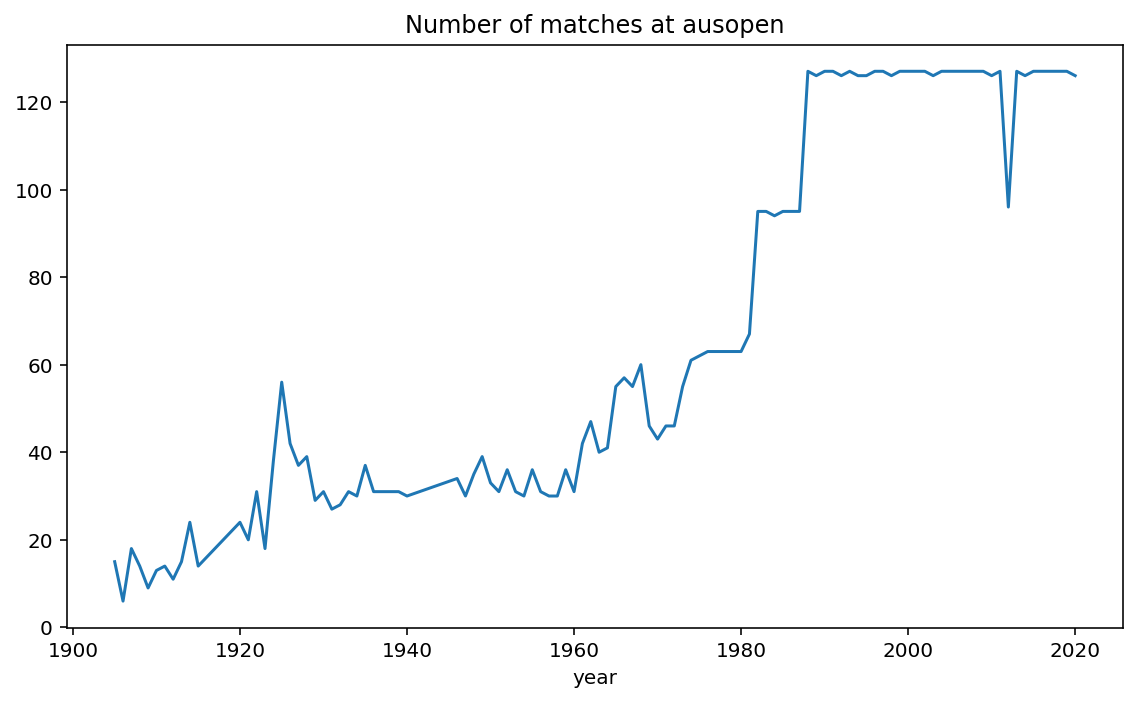

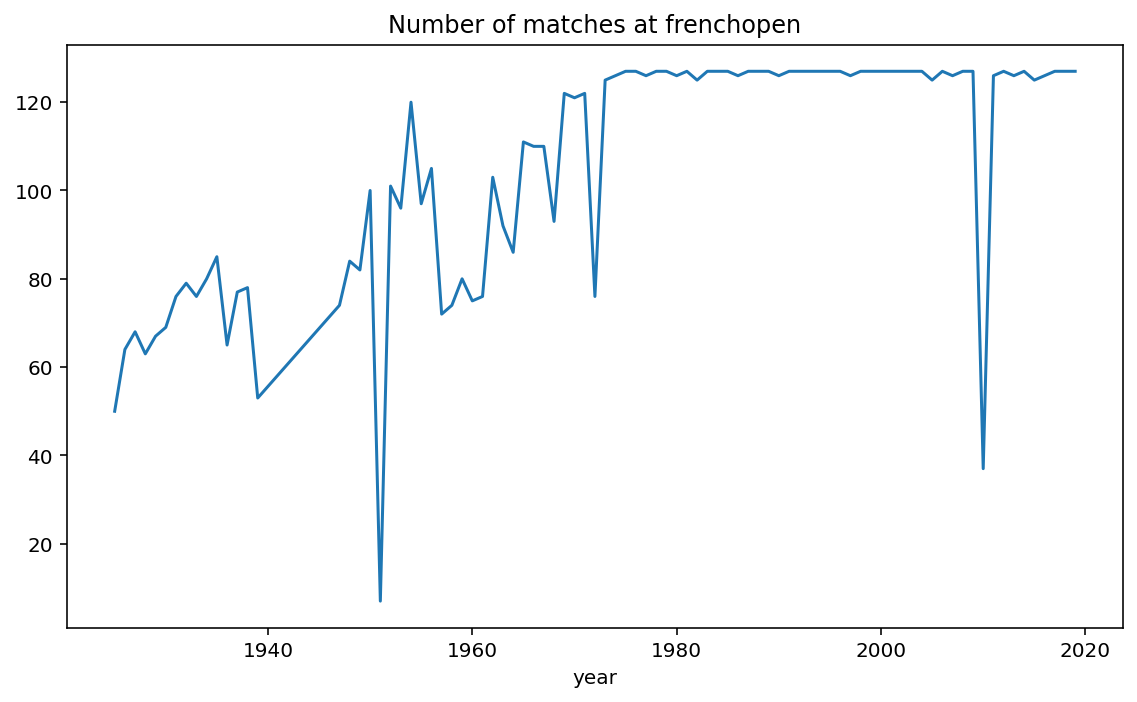

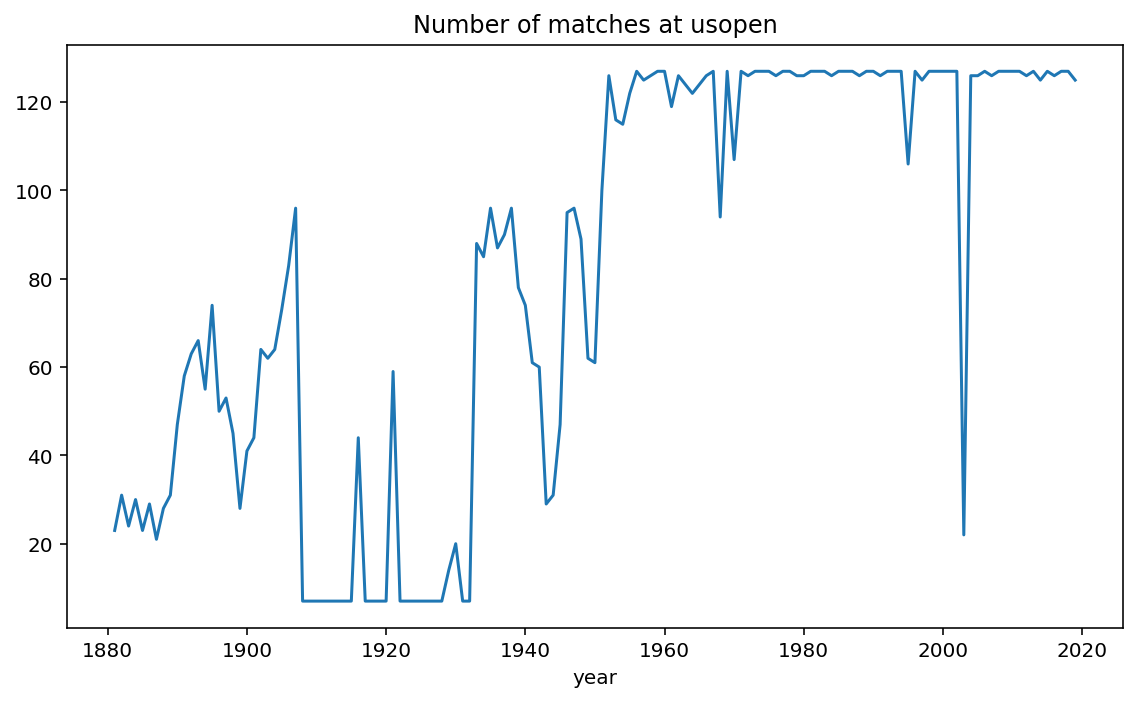

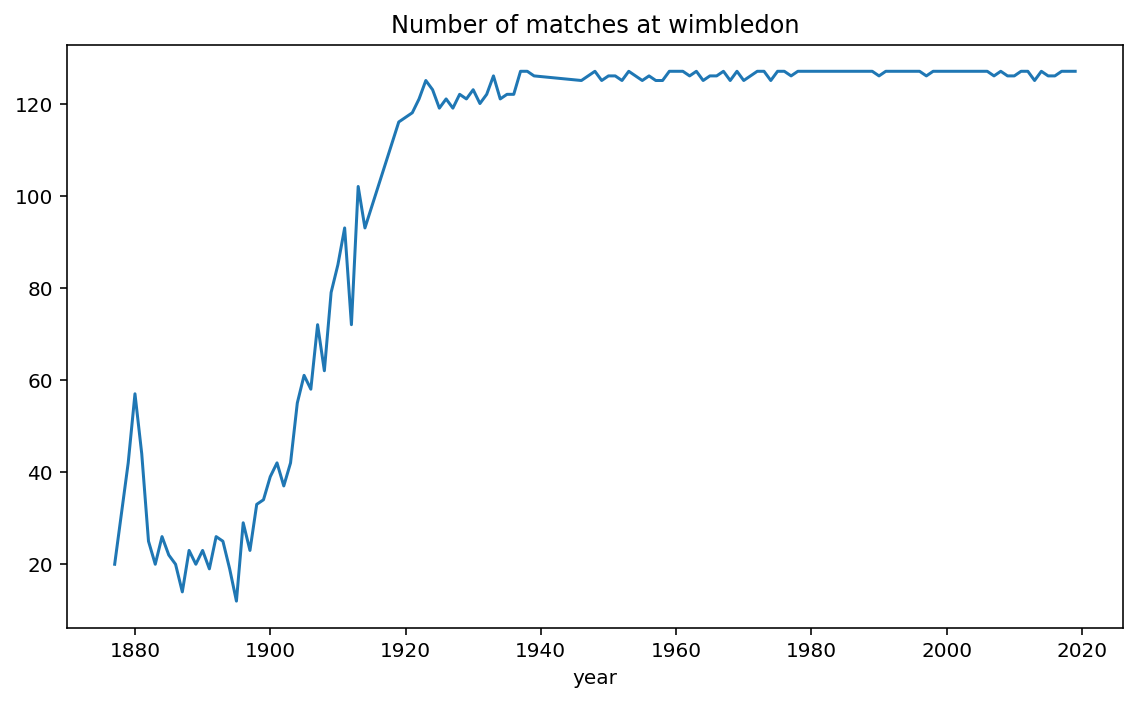

In [8]:
for cur_tourney in sorted(mens['tourney_name'].unique()):
    f, ax = plt.subplots(1, 1)
    mens[mens['tourney_name'] == cur_tourney].groupby('year').apply(lambda x: x.shape[0]).plot(ax=ax)
    ax.set_title(f'Number of matches at {cur_tourney}')
    f.set_size_inches(8, 5)
    f.tight_layout()

In [5]:
womens = load_and_combine_data('womens')

In [6]:
womens.head()

,match,year,round,round_number,winner,loser,sets_winner,sets_loser,games_winner,games_loser,surface,tourney_name,tourney_order
1,1,1887,quarterfinals,5,Ellen Hansell,Jessie Harding,2.0,0.0,12.0,1.0,grass,usopen,4
595,2,1887,quarterfinals,5,Helen Day Harris,Louise Alderdice,2.0,0.0,12.0,8.0,grass,usopen,4
1386,4,1887,quarterfinals,5,Laura Knight,Ruth Cott,2.0,0.0,12.0,3.0,grass,usopen,4
2,1,1887,semifinals,6,Ellen Hansell,Helen Day Harris,2.0,1.0,14.0,14.0,grass,usopen,4
596,2,1887,semifinals,6,Alice Janney,Laura Knight,2.0,0.0,13.0,6.0,grass,usopen,4


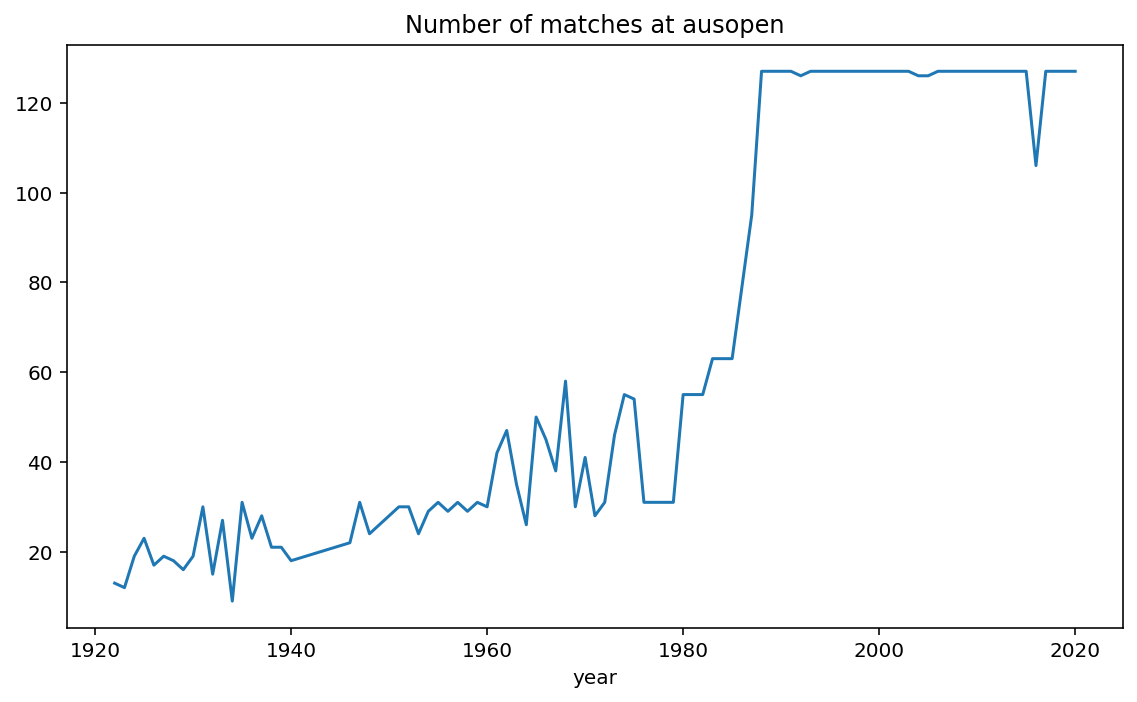

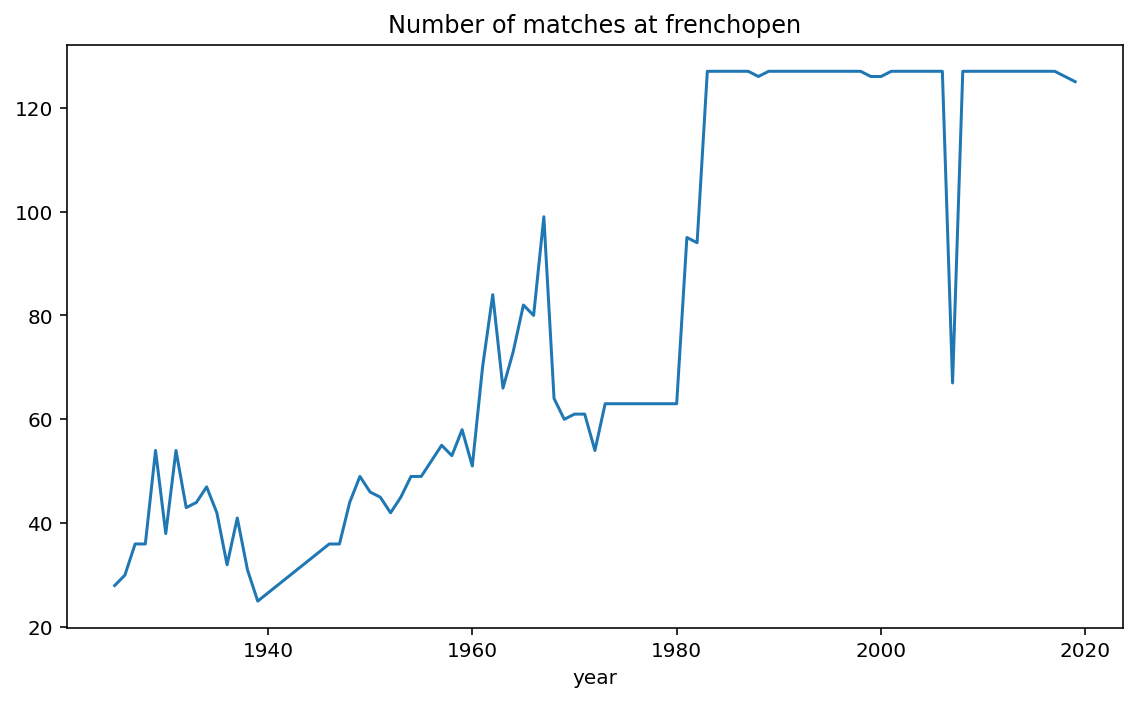

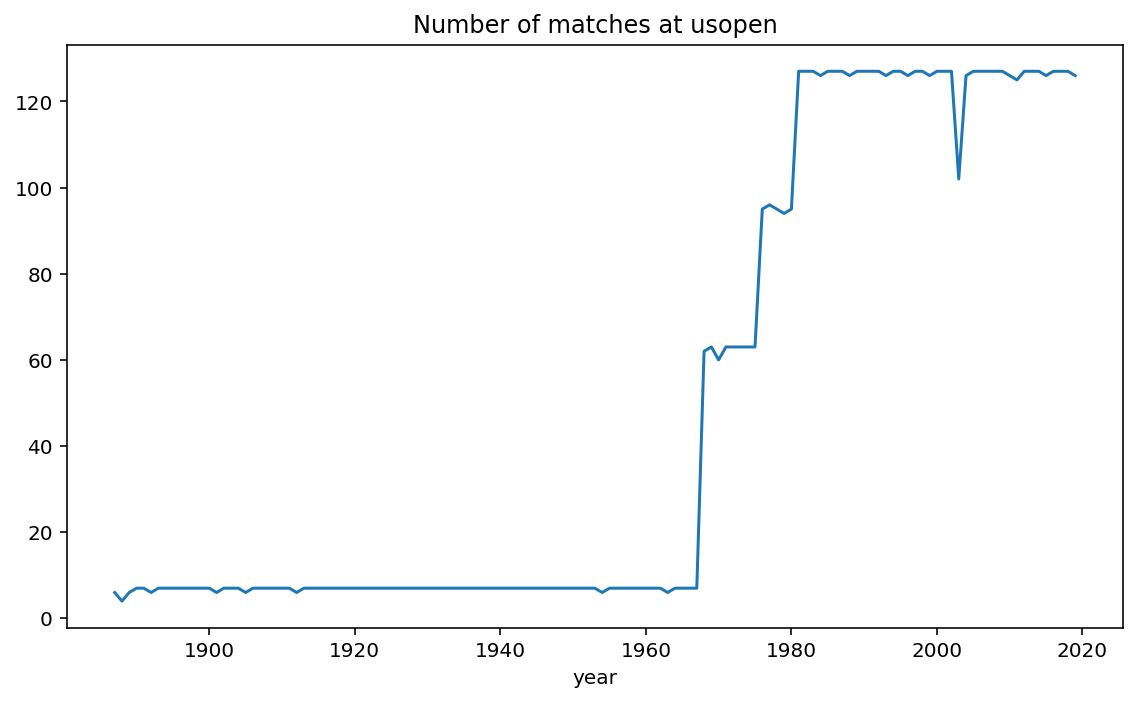

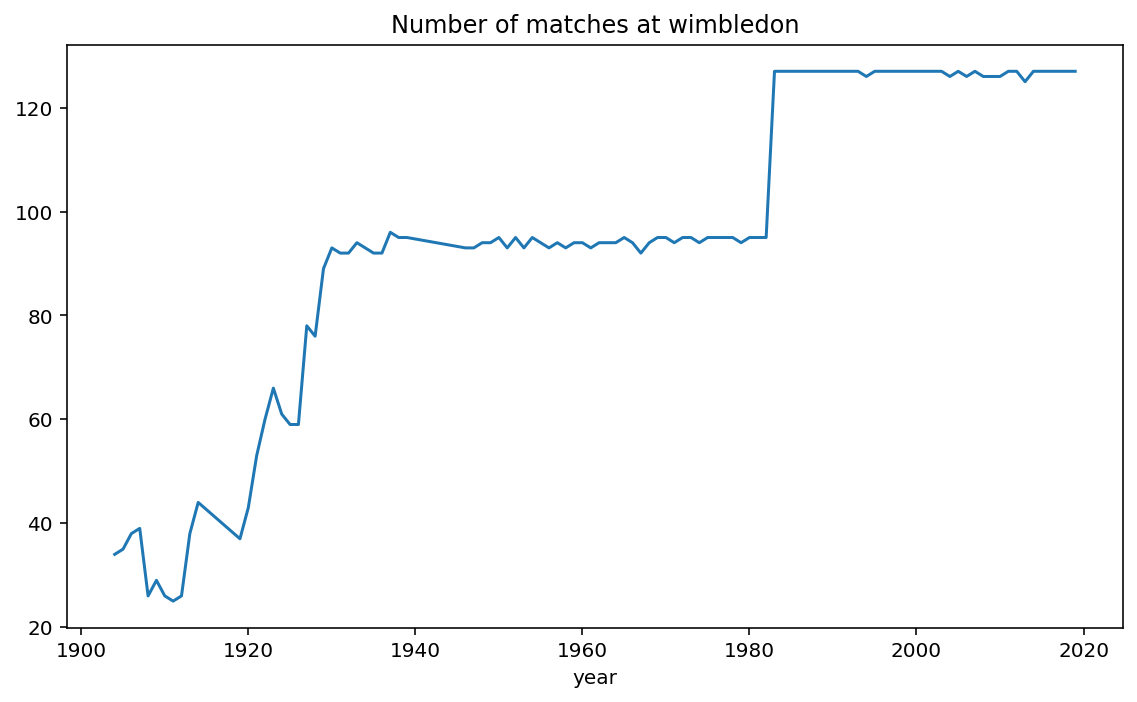

In [9]:
for cur_tourney in sorted(womens['tourney_name'].unique()):
    f, ax = plt.subplots(1, 1)
    womens[womens['tourney_name'] == cur_tourney].groupby('year').apply(lambda x: x.shape[0]).plot(ax=ax)
    ax.set_title(f'Number of matches at {cur_tourney}')
    f.set_size_inches(8, 5)
    f.tight_layout()